In [1]:
import cv2
from matplotlib import pyplot as plt
from calibrate import StereoCalibration, read_stereo_calibration, rectify_images

In [ ]:
left_path = "data/left"
right_path = "data/right"
chessboard_height = 6
chessboard_width = 9
square_size = 0.076
file_extension = ".png"

stereo_calibration = StereoCalibration(
    left_path,
    right_path,
    chessboard_height,
    chessboard_width,
    square_size,
    file_extension,
)

stereo_calibration.calibrate()
stereo_calibration.save_stereo_calibration()

In [2]:
stereo_calibration_path = 'output/stereo_calibration.xml'
stereo_map_left, stereo_map_right = read_stereo_calibration(stereo_calibration_path)

Reading stereo calibration...


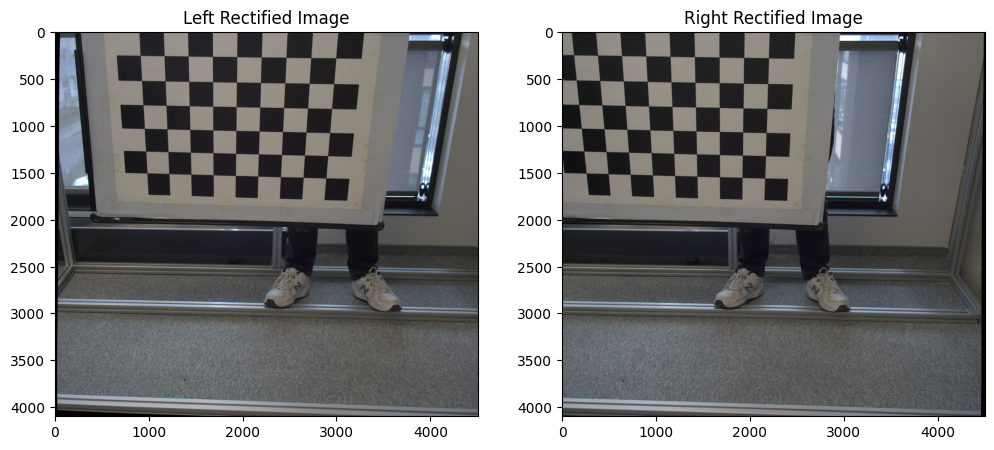

In [3]:
left_image_path = "data/left/left_20250410_160812_1.png"
right_image_path = "data/right/right_20250410_160812_1.png"
left_image = cv2.imread(left_image_path, cv2.IMREAD_COLOR)
right_image = cv2.imread(right_image_path, cv2.IMREAD_COLOR)
left_rectified, right_rectified = rectify_images(left_image, right_image, stereo_map_left, stereo_map_right)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.title('Left Rectified Image')
plt.imshow(cv2.cvtColor(left_rectified, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.title('Right Rectified Image')
plt.imshow(cv2.cvtColor(right_rectified, cv2.COLOR_BGR2RGB))
plt.show()